# Vehicle Price Prediction - Internship Project

The goal of this project is to build a regression model to accurately predict the price of used vehicles based on their features like manufacturer, year, body, etc. reading.

## Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

## Data Overview

- Importing csv

In [2]:
data = pd.read_csv("dataset.csv")

In [3]:
# Set the option to display all columns
pd.set_option('display.max_columns', None)

In [4]:
data.head()

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


- Shape

In [5]:
shape = data.shape
print(f"No of rows {shape[0]}")
print(f"No of cols {shape[1]}")

No of rows 1002
No of cols 17


- Info

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1002 non-null   object 
 1   description     946 non-null    object 
 2   make            1002 non-null   object 
 3   model           1002 non-null   object 
 4   year            1002 non-null   int64  
 5   price           979 non-null    float64
 6   engine          1000 non-null   object 
 7   cylinders       897 non-null    float64
 8   fuel            995 non-null    object 
 9   mileage         968 non-null    float64
 10  transmission    1000 non-null   object 
 11  trim            1001 non-null   object 
 12  body            999 non-null    object 
 13  doors           995 non-null    float64
 14  exterior_color  997 non-null    object 
 15  interior_color  964 non-null    object 
 16  drivetrain      1002 non-null   object 
dtypes: float64(4), int64(1), object(1

In [7]:
data.describe()

,year,price,cylinders,mileage,doors
count,1002.000000,979.000000,897.000000,968.000000,995.000000
mean,2023.916168,50202.985700,4.975474,69.033058,3.943719
std,0.298109,18700.392062,1.392526,507.435745,0.274409
min,2023.000000,0.000000,0.000000,0.000000,2.000000
25%,2024.000000,36600.000000,4.000000,4.000000,4.000000
50%,2024.000000,47165.000000,4.000000,8.000000,4.000000
75%,2024.000000,58919.500000,6.000000,13.000000,4.000000
max,2025.000000,195895.000000,8.000000,9711.000000,5.000000


- Columns name

In [76]:
list(data.columns)

['name',
 'description',
 'make',
 'model',
 'year',
 'price',
 'engine',
 'cylinders',
 'fuel',
 'mileage',
 'transmission',
 'trim',
 'body',
 'doors',
 'exterior_color',
 'interior_color',
 'drivetrain']

- How many nan values are their in each column

In [8]:
data.isna().sum()

name                0
description        56
make                0
model               0
year                0
price              23
engine              2
cylinders         105
fuel                7
mileage            34
transmission        2
trim                1
body                3
doors               7
exterior_color      5
interior_color     38
drivetrain          0
dtype: int64

- Every Category in each feature

In [9]:
print("Drive Train: ", list(data['drivetrain'].unique()))
print("Makers Names: ", list(data['make'].unique()))
print("Cylinders: ", list(data['cylinders'].unique()))
print("Fuel Types: ", list(data['fuel'].unique()))
print("cars Body Type: ", list(data['body'].unique()))
print("No. of Doors: ", list(data['doors'].unique()))

Drive Train:  ['Four-wheel Drive', 'All-wheel Drive', 'Rear-wheel Drive', 'Front-wheel Drive']
Makers Names:  ['Jeep', 'GMC', 'Dodge', 'RAM', 'Nissan', 'Ford', 'Hyundai', 'Chevrolet', 'Volkswagen', 'Chrysler', 'Kia', 'Mazda', 'Acura', 'Subaru', 'Audi', 'BMW', 'Toyota', 'Buick', 'Mercedes-Benz', 'Honda', 'Lincoln', 'Cadillac', 'INFINITI', 'Lexus', 'Land Rover', 'Volvo', 'Genesis', 'Jaguar']
Cylinders:  [np.float64(6.0), np.float64(8.0), np.float64(4.0), np.float64(nan), np.float64(3.0), np.float64(0.0)]
Fuel Types:  ['Gasoline', 'Diesel', 'Hybrid', 'Electric', 'E85 Flex Fuel', 'PHEV Hybrid Fuel', nan, 'Diesel (B20 capable)']
cars Body Type:  ['SUV', 'Pickup Truck', 'Sedan', 'Passenger Van', 'Cargo Van', nan, 'Hatchback', 'Convertible', 'Minivan']
No. of Doors:  [np.float64(4.0), np.float64(3.0), np.float64(nan), np.float64(2.0), np.float64(5.0)]


**Note:** You will see nan values in category is it because it is not yet cleaned

## Data Cleaning

### Data Droping and Imputation

1. Delete name and description column

In [10]:
cleanedData = data.drop(['name', 'description'], axis=1)
cleanedData.head(2)

,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive


Name column is to be deleted because the same data are already present in year, make, model, trim columns

2. Remove nan values from engine

In [11]:
cleanedData[cleanedData['engine'].isna()]

,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
614,Honda,CR-V Hybrid,2025,42150.0,NaN,4.0,Gasoline,1.0,1-Speed CVT with Overdrive,Sport Touring,SUV,NaN,Canyon,Black,All-wheel Drive
803,Jeep,Wagoneer,2024,73999.0,NaN,6.0,Gasoline,59.0,8-Speed Automatic,Series II,SUV,4.0,Bright White Clearcoat,Black,Four-wheel Drive


In [12]:
cleanedData.loc[(cleanedData['make'] == "Honda") & (cleanedData['model'] == "CR-V Hybrid")]

,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
109,Honda,CR-V Hybrid,2024,42005.0,16V GDI DOHC Hybrid,4.0,Hybrid,1.0,Automatic CVT,Sport Touring,SUV,4.0,Radiant Red Metallic,Black,All-wheel Drive
304,Honda,CR-V Hybrid,2024,36900.0,16V GDI DOHC Hybrid,4.0,Hybrid,1.0,Automatic CVT,Sport,SUV,4.0,Lunar Silver Metallic,Black,All-wheel Drive
534,Honda,CR-V Hybrid,2024,40355.0,16V GDI DOHC Hybrid,4.0,Hybrid,68.0,Automatic CVT,Sport-L,SUV,4.0,Platinum White Pearl,Black,All-wheel Drive
614,Honda,CR-V Hybrid,2025,42150.0,NaN,4.0,Gasoline,1.0,1-Speed CVT with Overdrive,Sport Touring,SUV,NaN,Canyon,Black,All-wheel Drive
637,Honda,CR-V Hybrid,2024,36900.0,16V GDI DOHC Hybrid,4.0,Hybrid,1.0,Automatic CVT,Sport,SUV,4.0,Lunar Silver Metallic,Black,All-wheel Drive
673,Honda,CR-V Hybrid,2024,37505.0,16V GDI DOHC Hybrid,4.0,Hybrid,0.0,Automatic CVT,Sport-L,SUV,4.0,Platinum White Pearl,NaN,Front-wheel Drive


In [13]:
cleanedData[(cleanedData['make'] == "Jeep") & (cleanedData['model'] == "Wagoneer")& (cleanedData['trim'] == "Series II")]

,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
250,Jeep,Wagoneer,2024,87488.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,22.0,8-Speed Automatic,Series II,SUV,4.0,Riverrock Green,Global Black,Four-wheel Drive
261,Jeep,Wagoneer,2024,72908.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,NaN,8-Speed Automatic,Series II,SUV,4.0,Diamond Black,Black,Four-wheel Drive
399,Jeep,Wagoneer,2024,75888.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,NaN,8-Speed Automatic,Series II,SUV,4.0,Riverrock Green,Black,Four-wheel Drive
650,Jeep,Wagoneer,2024,84935.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,1.0,8-Speed Automatic,Series II,SUV,4.0,Velvet Red Pearlcoat,Global Black,Four-wheel Drive
772,Jeep,Wagoneer,2024,79487.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,18.0,8-Speed Automatic,Series II,SUV,4.0,Riverrock Green,Black,Four-wheel Drive
803,Jeep,Wagoneer,2024,73999.0,NaN,6.0,Gasoline,59.0,8-Speed Automatic,Series II,SUV,4.0,Bright White Clearcoat,Black,Four-wheel Drive
970,Jeep,Wagoneer,2024,74625.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,Silver,Global Black,Four-wheel Drive


**Note:** As we can see from above rows containing nan values can be filled by locating similar type of models and makers, and here they both containing same engine as founded
1. `Honda` with `CR-V Hybrid` have `16V GDI DOHC Hybrid` engine and doors `4.0`.
2. `Jeep` with `Wagoneer` have `24V GDI DOHC Twin Turbo` engine.

In [14]:
cleanedData.loc[614,'engine'] = "16V GDI DOHC Hybrid"
cleanedData.loc[614,'doors'] = np.float64(4.0)
cleanedData.loc[803,'engine'] = "24V GDI DOHC Twin Turbo"

In [15]:
cleanedData.isna().sum()

make                0
model               0
year                0
price              23
engine              0
cylinders         105
fuel                7
mileage            34
transmission        2
trim                1
body                3
doors               6
exterior_color      5
interior_color     38
drivetrain          0
dtype: int64

3. Remove nan values from transmission

In [16]:
cleanedData[cleanedData['transmission'].isna()]

,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
725,Mercedes-Benz,EQS 450,2024,111245.0,c,NaN,Electric,10.0,NaN,Base 4MATIC,Sedan,4.0,White,Black,All-wheel Drive
940,Ford,Transit-350,2024,52530.0,24V PDI DOHC Flexible Fuel,6.0,E85 Flex Fuel,1.0,NaN,148 WB Medium Roof Cargo,Cargo Van,3.0,White,NaN,Rear-wheel Drive


In [17]:
cleanedData[(cleanedData['make'] == "Ford") & (cleanedData['model'] == "Transit-350") & (cleanedData['engine'] == "24V GDI DOHC Twin Turbo")]

,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
793,Ford,Transit-350,2023,57000.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,5581.0,10-Speed Automatic,Base,Cargo Van,3.0,White,Gray,Rear-wheel Drive
805,Ford,Transit-350,2023,54525.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,0.0,10-Speed Automatic,NaN,Cargo Van,3.0,Oxford White,Dark Palazzo Gray,Rear-wheel Drive


In [18]:
cleanedData[(cleanedData['make'] == "Mercedes-Benz") & (cleanedData['model'] == "EQS 450") & (cleanedData['body'] == "Sedan")]

,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
142,Mercedes-Benz,EQS 450,2024,NaN,c,NaN,Electric,8.0,Automatic,Base 4MATIC,Sedan,4.0,Graphite Gray Metallic,Gray,All-wheel Drive
253,Mercedes-Benz,EQS 450,2024,110395.0,c,NaN,Electric,5.0,Automatic,Base 4MATIC,Sedan,4.0,Obsidian Black Metallic,Black,All-wheel Drive
328,Mercedes-Benz,EQS 450,2024,NaN,c,NaN,Electric,10.0,Automatic,Base 4MATIC,Sedan,4.0,Obsidian Black Metallic,Black,All-wheel Drive
372,Mercedes-Benz,EQS 450,2024,NaN,c,NaN,Electric,4.0,Automatic,Base 4MATIC,Sedan,4.0,Polar White,Macchiato Beige,All-wheel Drive
484,Mercedes-Benz,EQS 450,2024,117985.0,c,NaN,Electric,1.0,Automatic,Base 4MATIC,Sedan,4.0,Obsidian Black Metallic,Black,All-wheel Drive
725,Mercedes-Benz,EQS 450,2024,111245.0,c,NaN,Electric,10.0,NaN,Base 4MATIC,Sedan,4.0,White,Black,All-wheel Drive


**Note:** Same approach is used here looking at the same make, model, engine or body we can find same cars
1. `Mercedes-Benz` of model `EQS 450` and body `Sedan` have transmission `Automatic`
2. `Ford` of model `Transit-350` and engine `24V GDI DOHC Twin Turbo` have transmission `10-Speed Automatic`

In [19]:
cleanedData.loc[725,'transmission'] = "Automatic"
cleanedData.loc[940,'transmission'] = "10-Speed Automatic"

In [20]:
cleanedData.isna().sum()

make                0
model               0
year                0
price              23
engine              0
cylinders         105
fuel                7
mileage            34
transmission        0
trim                1
body                3
doors               6
exterior_color      5
interior_color     38
drivetrain          0
dtype: int64

4. Remove nan values from trim

In [21]:
cleanedData[cleanedData['trim'].isna()]

,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
805,Ford,Transit-350,2023,54525.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,0.0,10-Speed Automatic,NaN,Cargo Van,3.0,Oxford White,Dark Palazzo Gray,Rear-wheel Drive


In [22]:
cleanedData[(cleanedData['make'] == "Ford") & (cleanedData['model'] == "Transit-350") & (cleanedData['engine'] == "24V GDI DOHC Twin Turbo")]

,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
793,Ford,Transit-350,2023,57000.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,5581.0,10-Speed Automatic,Base,Cargo Van,3.0,White,Gray,Rear-wheel Drive
805,Ford,Transit-350,2023,54525.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,0.0,10-Speed Automatic,NaN,Cargo Van,3.0,Oxford White,Dark Palazzo Gray,Rear-wheel Drive


In [23]:
cleanedData.loc[805,'trim'] = "base"

In [24]:
cleanedData.isna().sum()

make                0
model               0
year                0
price              23
engine              0
cylinders         105
fuel                7
mileage            34
transmission        0
trim                0
body                3
doors               6
exterior_color      5
interior_color     38
drivetrain          0
dtype: int64

5. Remove nan values from body

In [25]:
cleanedData[cleanedData['body'].isna()]

,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
164,Dodge,Hornet,2024,41497.0,"4 gasoline direct injection, DOHC, Multiair va...",4.0,Gasoline,11.0,6-Speed Automatic,R/T EAWD,NaN,4.0,Hot Tamale,Black,All-wheel Drive
235,Dodge,Hornet,2024,41036.0,"4 gasoline direct injection, DOHC, Multiair va...",4.0,Gasoline,5.0,6-Speed Automatic,R/T EAWD,NaN,4.0,8 Ball,Black,All-wheel Drive
687,INFINITI,QX50,2024,49404.0,ER,4.0,Gasoline,7.0,(CVT) CONT VAR.,SPORT,NaN,4.0,Radiant White,Monaco Red,Front-wheel Drive


In [26]:
cleanedData[(cleanedData['make'] == "INFINITI") & (cleanedData['model'] == "QX50")]

,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
167,INFINITI,QX50,2024,48350.0,"o 2L I-4 port/direct injection, DOHC, variable...",4.0,Gasoline,3.0,Variable,LUXE,SUV,4.0,Slate Gray,Pebble Gray,Front-wheel Drive
335,INFINITI,QX50,2024,45055.0,"o 2L I-4 port/direct injection, DOHC, variable...",4.0,Gasoline,25.0,Variable,LUXE,SUV,4.0,Black Obsidian,Pebble Gray,Front-wheel Drive
687,INFINITI,QX50,2024,49404.0,ER,4.0,Gasoline,7.0,(CVT) CONT VAR.,SPORT,NaN,4.0,Radiant White,Monaco Red,Front-wheel Drive
799,INFINITI,QX50,2024,46855.0,"o 2L I-4 port/direct injection, DOHC, variable...",4.0,Gasoline,11.0,Variable,LUXE,SUV,4.0,Radiant White,Pebble Gray,Front-wheel Drive


In [27]:
cleanedData[(cleanedData['make'] == "Dodge") & (cleanedData['model'] == "Hornet") & (cleanedData['engine'] == "4 gasoline direct injection, DOHC, Multiair variable valv")][:5]

,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
55,Dodge,Hornet,2024,42855.0,"4 gasoline direct injection, DOHC, Multiair va...",4.0,Gasoline,5.0,6-Speed Automatic,R/T EAWD,SUV,4.0,8 Ball,Black,All-wheel Drive
164,Dodge,Hornet,2024,41497.0,"4 gasoline direct injection, DOHC, Multiair va...",4.0,Gasoline,11.0,6-Speed Automatic,R/T EAWD,NaN,4.0,Hot Tamale,Black,All-wheel Drive
235,Dodge,Hornet,2024,41036.0,"4 gasoline direct injection, DOHC, Multiair va...",4.0,Gasoline,5.0,6-Speed Automatic,R/T EAWD,NaN,4.0,8 Ball,Black,All-wheel Drive
243,Dodge,Hornet,2024,48595.0,"4 gasoline direct injection, DOHC, Multiair va...",4.0,Gasoline,0.0,6-Spd Aisin F21-250 PHEV Auto Trans,Hornet R/T Plus Eawd,SUV,4.0,8 Ball,Black,All-wheel Drive
511,Dodge,Hornet,2024,46490.0,"4 gasoline direct injection, DOHC, Multiair va...",4.0,Gasoline,21.0,6-Speed Automatic,R/T Plus EAWD,SUV,4.0,Q Ball,Black,All-wheel Drive


In [28]:
cleanedData.loc[164,'body'] = "SUV"
cleanedData.loc[235,'body'] = "SUV"
cleanedData.loc[687,'body'] = "SUV"

In [29]:
cleanedData.isna().sum()

make                0
model               0
year                0
price              23
engine              0
cylinders         105
fuel                7
mileage            34
transmission        0
trim                0
body                0
doors               6
exterior_color      5
interior_color     38
drivetrain          0
dtype: int64

6. Remove nan values from fuel

In [30]:
cleanedData[cleanedData['fuel'].isna()]

,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
128,Subaru,Solterra,2024,39934.0,c,NaN,NaN,5.0,1-Speed Automatic,Premium,SUV,4.0,Galactic,Black,All-wheel Drive
219,Honda,Prologue,2024,55800.0,c,NaN,NaN,NaN,1-Speed Automatic,TOURING,SUV,4.0,BX,Gray,All-wheel Drive
315,Honda,Prologue,2024,56550.0,c,NaN,NaN,1.0,1-Speed Automatic,TOURING,SUV,4.0,Gray,Black,All-wheel Drive
489,Honda,Prologue,2024,55800.0,c,NaN,NaN,NaN,1-Speed Automatic,TOURING,SUV,4.0,Pearl,Black,All-wheel Drive
490,Honda,Prologue,2024,55800.0,c,NaN,NaN,NaN,1-Speed Automatic,TOURING,SUV,4.0,Gray,Black,All-wheel Drive
610,Chevrolet,Equinox EV,2024,47495.0,<dt>VIN</dt>\n 3GN7DNRPXRS232327,NaN,NaN,0.0,Automatic,RS,SUV,NaN,Sterling Gray Metallic,Black,Front-wheel Drive
726,Jaguar,I-PACE,2024,77053.0,d>\n\n \n <dt>VIN</dt>\n SADHM2S12R1...,NaN,NaN,8.0,Automatic,EV400 R-Dynamic HSE,SUV,5.0,Santorini Black,Ebony,All-wheel Drive


In [31]:
cleanedData['fuel'].value_counts()

fuel
Gasoline                664
Hybrid                  137
Electric                 99
Diesel                   73
PHEV Hybrid Fuel         16
E85 Flex Fuel             5
Diesel (B20 capable)      1
Name: count, dtype: int64

**Note:** Generally all cars have fuel type gasoline so we are going to replace all nan value with `Gasoline`

In [32]:
cleanedData.fillna({'fuel':"Gasoline"},inplace=True)

7. Remove nan values from doors

In [33]:
cleanedData['doors'].value_counts()

doors
4.0    948
3.0     37
2.0     10
5.0      1
Name: count, dtype: int64

- Generally every car comes with 4 doors so nan values in doors columns are going to fill with 4

In [34]:
cleanedData.fillna({'doors':4},inplace=True)

In [35]:
cleanedData.isna().sum()

make                0
model               0
year                0
price              23
engine              0
cylinders         105
fuel                0
mileage            34
transmission        0
trim                0
body                0
doors               0
exterior_color      5
interior_color     38
drivetrain          0
dtype: int64

8. Remove nan values from exterior_colors

In [36]:
cleanedData[cleanedData['exterior_color'].isna()]

,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
117,Jeep,Wrangler,2024,59456.0,"ar 3.6L V-6 DOHC, variable valve control, regu...",6.0,Gasoline,15.0,Automatic,4-Door Sahara 4x4,SUV,4.0,NaN,Black,Four-wheel Drive
137,Acura,ZDX,2024,69850.0,c,0.0,Electric,0.0,Automatic,A-SPEC,SUV,4.0,NaN,NaN,All-wheel Drive
373,Mercedes-Benz,EQS 450,2024,114850.0,c,NaN,Electric,8.0,1-Speed Automatic,Base 4MATIC,SUV,4.0,NaN,Black,All-wheel Drive
608,Mercedes-Benz,Sprinter 2500,2023,58665.0,"gasoline direct injection, DOHC, variable valv...",4.0,Gasoline,0.0,Automatic,High Roof,Cargo Van,3.0,NaN,NaN,Rear-wheel Drive
612,Mercedes-Benz,Sprinter 2500,2024,65129.0,"diesel direct injection, DOHC, intercooled tur...",4.0,Diesel,0.0,Automatic,High Roof,Pickup Truck,3.0,NaN,NaN,Rear-wheel Drive


In [37]:
cleanedData['exterior_color'].value_counts()

exterior_color
Bright White Clearcoat       81
Black                        32
White                        29
Gray                         27
Diamond Black                26
                             ..
Aspen White / Super Black     1
Jungle Green                  1
Cactus Gray                   1
Pearl White Tricoat           1
Wheatland Yellow              1
Name: count, Length: 263, dtype: int64

- It is going to be filled with `Black` because `Bright White Clearcoat` already as 81 and by adding more numbers to it fill make the data unfair

In [38]:
cleanedData.fillna({'exterior_color': 'Black'},inplace=True)

**Doubt:** Is doing this good or not?

9. Remove nan values from price

In [39]:
cleanedData.fillna({'price':round(cleanedData['price'].mean(),2)},inplace=True)

10. Remove nan values from cylinders

In [40]:
cleanedData[cleanedData['cylinders'].isna()]

,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
14,Chevrolet,Blazer EV,2024,51695.0,c,NaN,Electric,4.0,1-Speed Automatic,2LT,SUV,4.0,Sterling Gray Metallic,Black,All-wheel Drive
28,Chevrolet,Blazer EV,2024,52190.0,c,NaN,Electric,6.0,1-Speed Automatic,2LT,SUV,4.0,Radiant Red,Black,All-wheel Drive
33,Kia,EV6,2024,49820.0,c,NaN,Electric,13.0,Automatic,GT,SUV,4.0,Yacht Blue,Black,All-wheel Drive
35,Ford,Mustang Mach-E,2024,47790.0,c,NaN,Electric,5.0,1-Speed Automatic,Premium,SUV,4.0,Vapor Blue,Black,All-wheel Drive
49,Hyundai,IONIQ 5,2024,44195.0,c,NaN,Electric,14.0,1-Speed Automatic,SE Standard Range,SUV,4.0,Atlas,Gray,Rear-wheel Drive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,BMW,i7,2024,195895.0,c,NaN,Electric,0.0,1-Speed Automatic,M70,Sedan,4.0,Gray Metallic,Caramel,All-wheel Drive
893,Honda,CR-V,2025,38305.0,d>\n\n \n <dt>VIN</dt>\n 7FARS4H71SE...,NaN,Gasoline,0.0,Automatic CVT,EX-L,SUV,4.0,Urban Gray Pearl,Black,All-wheel Drive
941,Hyundai,IONIQ 5,2024,38201.0,c,NaN,Electric,12.0,Automatic,SE,SUV,4.0,Teal,Gray,Rear-wheel Drive
944,Kia,EV6,2024,41528.0,c,NaN,Electric,13.0,Automatic,Wind,SUV,4.0,Blue,Black,All-wheel Drive


In [41]:
cleanedData[cleanedData['fuel'] == "Gasoline"]['cylinders'].value_counts()

cylinders
4.0    347
6.0    207
8.0     82
3.0     27
Name: count, dtype: int64

- We are going to fill `4` in cylinders whose `cylinders` are `Nan` and fuel type is `Gasoline`

In [42]:
cleanedData.loc[(cleanedData['cylinders'].isna()) & (cleanedData['fuel'] == 'Gasoline'),'cylinders'] = 4

- We are going to fill `0` in cylinders whose `cylinders` are `Nan` and fuel type is `Electric`

In [43]:
cleanedData.loc[(cleanedData['cylinders'].isna()) & (cleanedData['fuel'] == 'Electric'),'cylinders'] = 0

11. Remove nan values from mileage

In [44]:
cleanedData[cleanedData['mileage'].isna()][:5]

,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
27,Chrysler,Pacifica,2024,48705.0,24V MPFI DOHC,6.0,Gasoline,NaN,9-Speed Automatic,Touring-L,Passenger Van,4.0,Diamond Black,Black,All-wheel Drive
47,Subaru,Outback,2024,44354.0,16V GDI DOHC Turbo,4.0,Gasoline,NaN,Automatic CVT,Wilderness,SUV,4.0,Magnetite,Gray,All-wheel Drive
63,Jeep,Grand Cherokee L,2024,51360.0,24V MPFI DOHC,6.0,Gasoline,NaN,8-Speed Automatic,Limited,SUV,4.0,Bright White Clearcoat,Beige / Black,Rear-wheel Drive
73,Jeep,Wagoneer,2024,63057.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,NaN,8-Speed Automatic,Base,SUV,4.0,Metallic,Black,Four-wheel Drive
84,Jeep,Grand Cherokee L,2024,49390.0,OHV,6.0,Gasoline,NaN,8-Speed Automatic,Limited,SUV,4.0,Diamond Black,Global Black,Four-wheel Drive


In [45]:
cleanedData['mileage'].value_counts()

mileage
5.0      116
0.0      110
10.0     108
1.0       58
6.0       50
        ... 
697.0      1
66.0       1
41.0       1
141.0      1
296.0      1
Name: count, Length: 95, dtype: int64

- Generally the milage is 5.0 so we are going to replace it with nan values

In [46]:
cleanedData.fillna({'mileage': 5.0},inplace=True)

**Doubt:** Is doing this a good option?

12. Remove nan values from interior_colors

In [47]:
cleanedData['interior_color'].value_counts()

interior_color
Black           510
Global Black     84
Gray             77
Jet Black        45
Ebony            43
               ... 
Caramel           1
gray              1
Dark Palazzo      1
Gray/Black        1
Navy Pier         1
Name: count, Length: 91, dtype: int64

- Here `Black` interior is the most commone one

In [48]:
cleanedData.fillna({'interior_color':'Black'},inplace=True)

In [49]:
cleanedData.isna().sum()

make              0
model             0
year              0
price             0
engine            0
cylinders         0
fuel              0
mileage           0
transmission      0
trim              0
body              0
doors             0
exterior_color    0
interior_color    0
drivetrain        0
dtype: int64

In [50]:
cleanedData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   make            1002 non-null   object 
 1   model           1002 non-null   object 
 2   year            1002 non-null   int64  
 3   price           1002 non-null   float64
 4   engine          1002 non-null   object 
 5   cylinders       1002 non-null   float64
 6   fuel            1002 non-null   object 
 7   mileage         1002 non-null   float64
 8   transmission    1002 non-null   object 
 9   trim            1002 non-null   object 
 10  body            1002 non-null   object 
 11  doors           1002 non-null   float64
 12  exterior_color  1002 non-null   object 
 13  interior_color  1002 non-null   object 
 14  drivetrain      1002 non-null   object 
dtypes: float64(4), int64(1), object(10)
memory usage: 117.6+ KB


##### Achievement

Without removing any data we successully cleaned our dataset with right values

### Detecting Outliers

Possible Outliers can exist in:
- price
- mileage

Before Removing Outliers

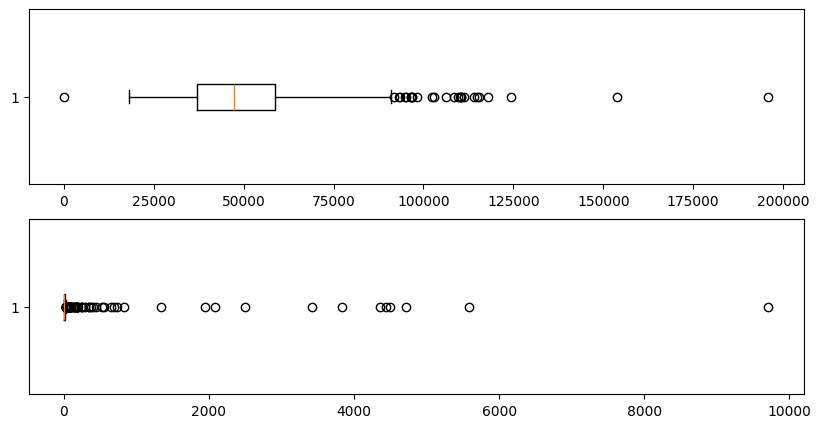

In [51]:
fig, axs = plt.subplots(2,1, figsize=(10, 5)) # 2 rows, 2 columns
axs[0].boxplot(cleanedData['price'],orientation='horizontal')
axs[1].boxplot(cleanedData['mileage'],orientation='horizontal')
plt.show()

In [52]:
cleanedData = cleanedData[(cleanedData['price'] < 100000) & (cleanedData['price'] > 10)]

In [53]:
cleanedData = cleanedData[cleanedData['mileage'] < 30]

**Note:** I dont know if i handeled the outliers correctly or not

After Removing Outliers

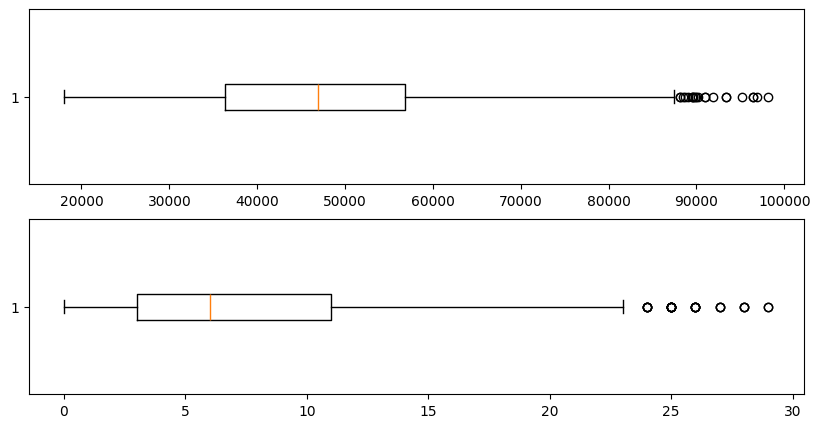

In [54]:
fig, axs = plt.subplots(2,1, figsize=(10, 5)) # 2 rows, 2 columns
axs[0].boxplot(cleanedData['price'],orientation='horizontal')
axs[1].boxplot(cleanedData['mileage'],orientation='horizontal')
plt.show()

Shape now after cleaning the data

In [55]:
shape = cleanedData.shape
print(f"No. of rows: {shape[0]}")
print(f"No. of rows removed: {data.shape[0]-shape[0]}")

No. of rows: 894
No. of rows removed: 108


## EDA

In [75]:
cleanedData.to_csv('cleaned_dataset.csv')

1. Create a Histogram of Price to see the distribution of price

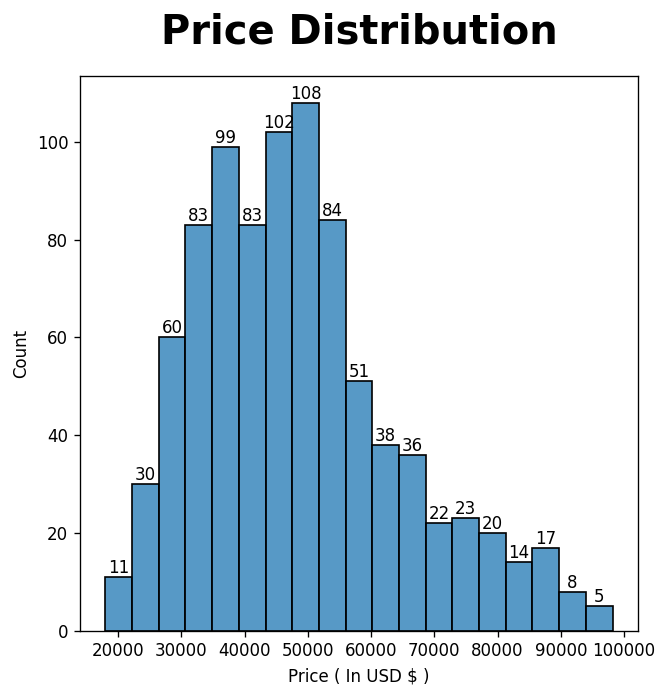

In [56]:
plt.figure(figsize=(6,6),dpi=120)
ax = sns.histplot(cleanedData['price'])
ax.bar_label(ax.containers[0],fontsize = 10)
ax.set_xlabel("Price ( In USD $ )")
ax.set_ylabel("Count")
ax.set_title("Price Distribution",fontdict={'weight':"bold",'size':24},pad=20)
plt.show()

2. We will create a Bar graph of `make` feature to how many cars in total is made by each maker

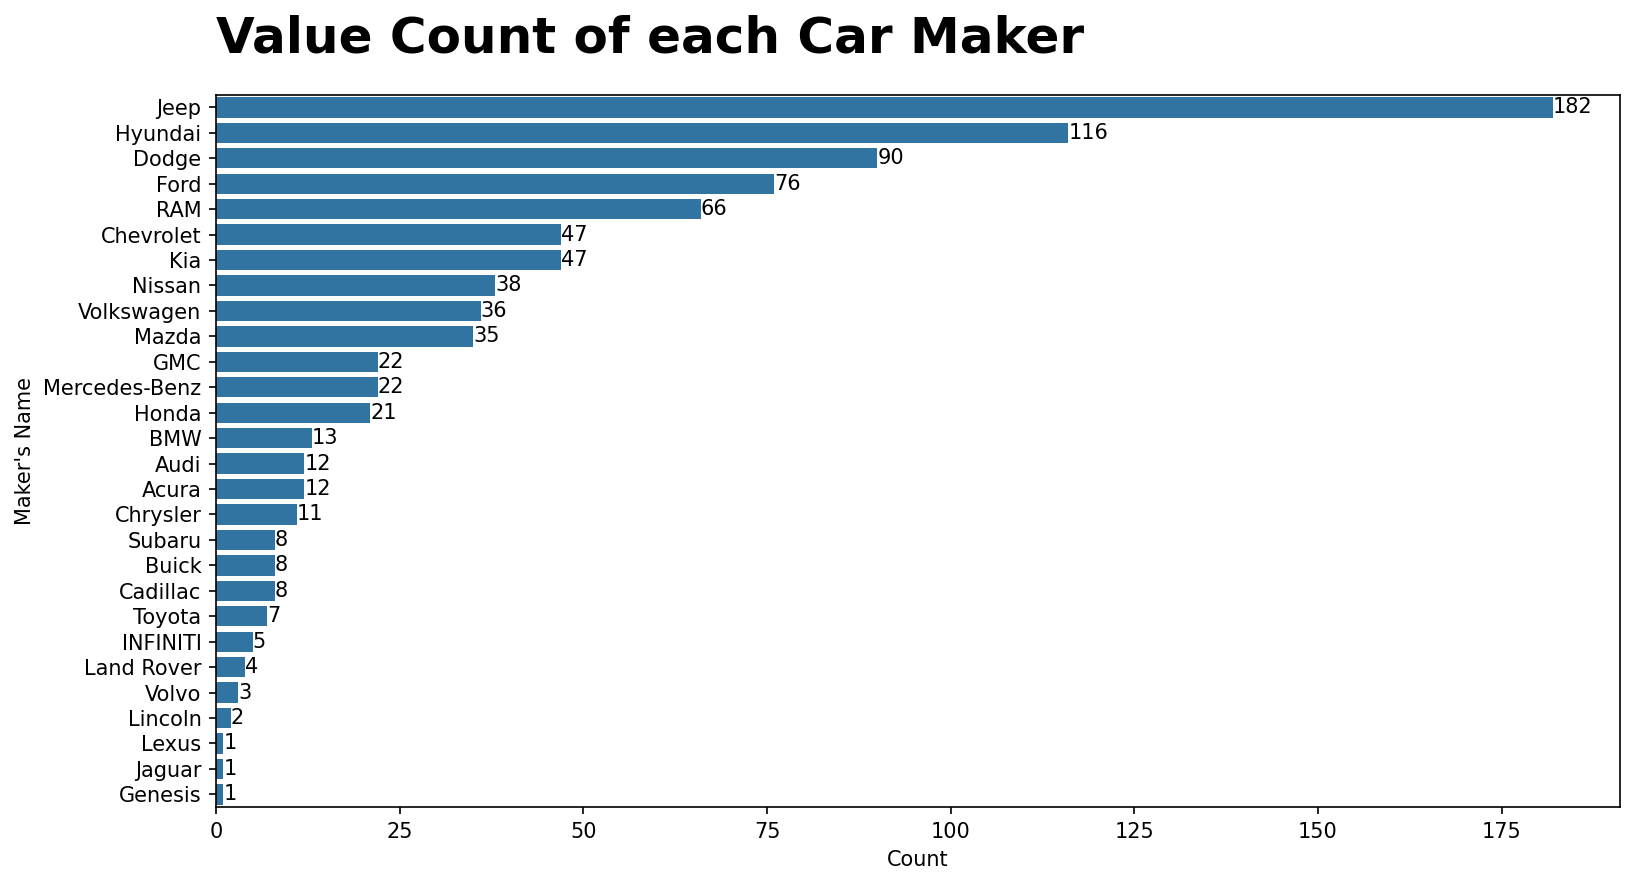

In [57]:
plt.figure(figsize=(11,6),dpi=150)

ax = sns.barplot(data=cleanedData['make'].value_counts(),errorbar=None,estimator="sum",orient="y",width=1,gap=0.2)
ax.bar_label(ax.containers[0],fontsize = 10)
ax.set_xlabel("Count")
ax.set_ylabel("Maker's Name")
ax.set_title("Value Count of each Car Maker",loc="left",fontdict={'weight':"bold",'size':24},pad=20)

plt.tight_layout()
plt.show()

3. Create a Histogram of fuel

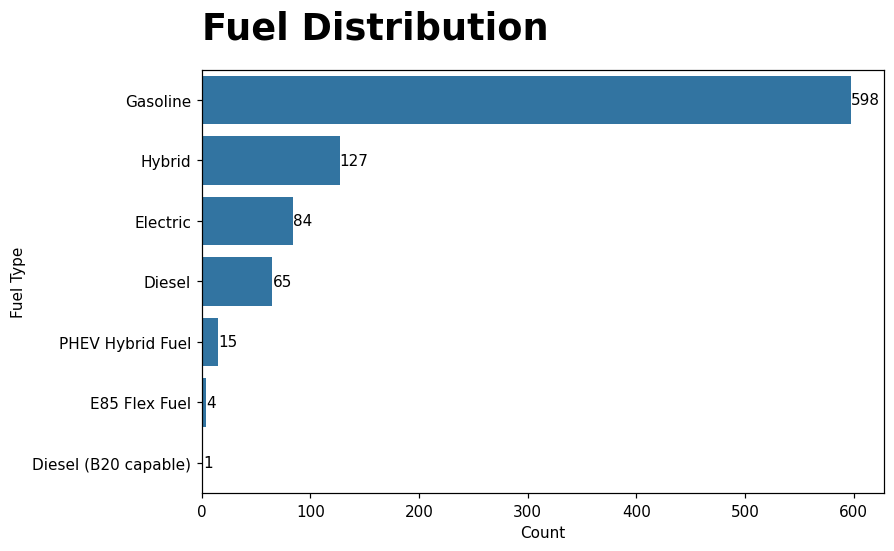

In [58]:
plt.figure(figsize=(8,5),dpi=110)
ax = sns.barplot(cleanedData['fuel'].value_counts(),errorbar=None,orient='y')
ax.bar_label(ax.containers[0],fontsize = 10)
ax.set_xlabel("Count")
ax.set_ylabel("Fuel Type")
ax.set_title("Fuel Distribution",fontdict={'weight':"bold",'size':24},pad=20,loc='left')
plt.show()

4. Create a Bar graph of `Body` do see general body type of all cars

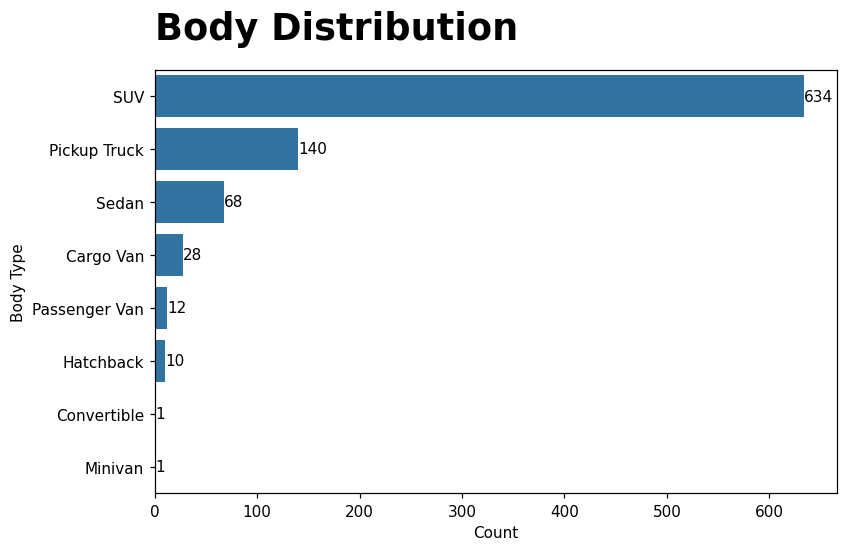

In [59]:
plt.figure(figsize=(8,5),dpi=110)
ax = sns.barplot(cleanedData['body'].value_counts(),errorbar=None,orient='y')
ax.bar_label(ax.containers[0],fontsize = 10)
ax.set_xlabel("Count")
ax.set_ylabel("Body Type")
ax.set_title("Body Distribution",fontdict={'weight':"bold",'size':24},pad=20,loc='left')
plt.show()

5. Create a Bar Graph of `drivetrain`

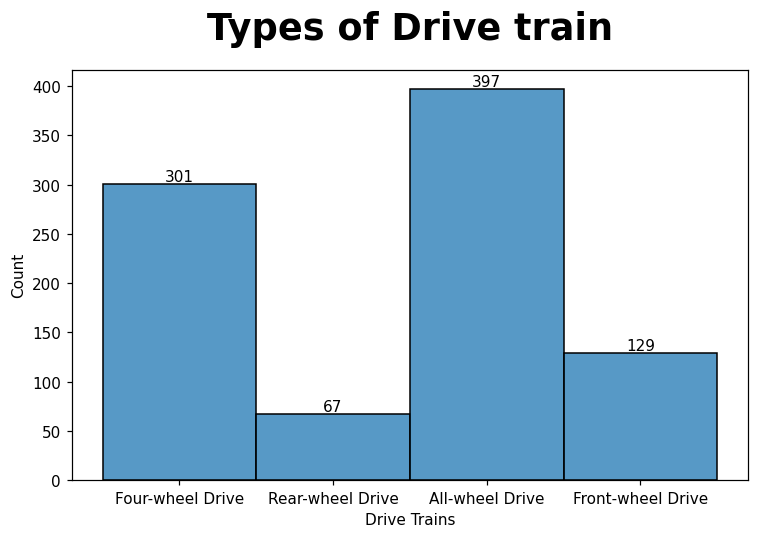

In [60]:
plt.figure(figsize=(7,5),dpi=110)

ax = sns.histplot(cleanedData['drivetrain'])
ax.bar_label(ax.containers[0],fontsize = 10)
ax.tick_params(axis='x')
ax.set_xlabel("Drive Trains")
ax.set_ylabel("Count")
ax.set_title("Types of Drive train",fontdict={'weight':"bold",'size':24},pad=20)
plt.tight_layout()
plt.show()

6. Create a scatter plot where x axis makers name in ascending order of price and y axis show price ( The idea to show how much each company spend )

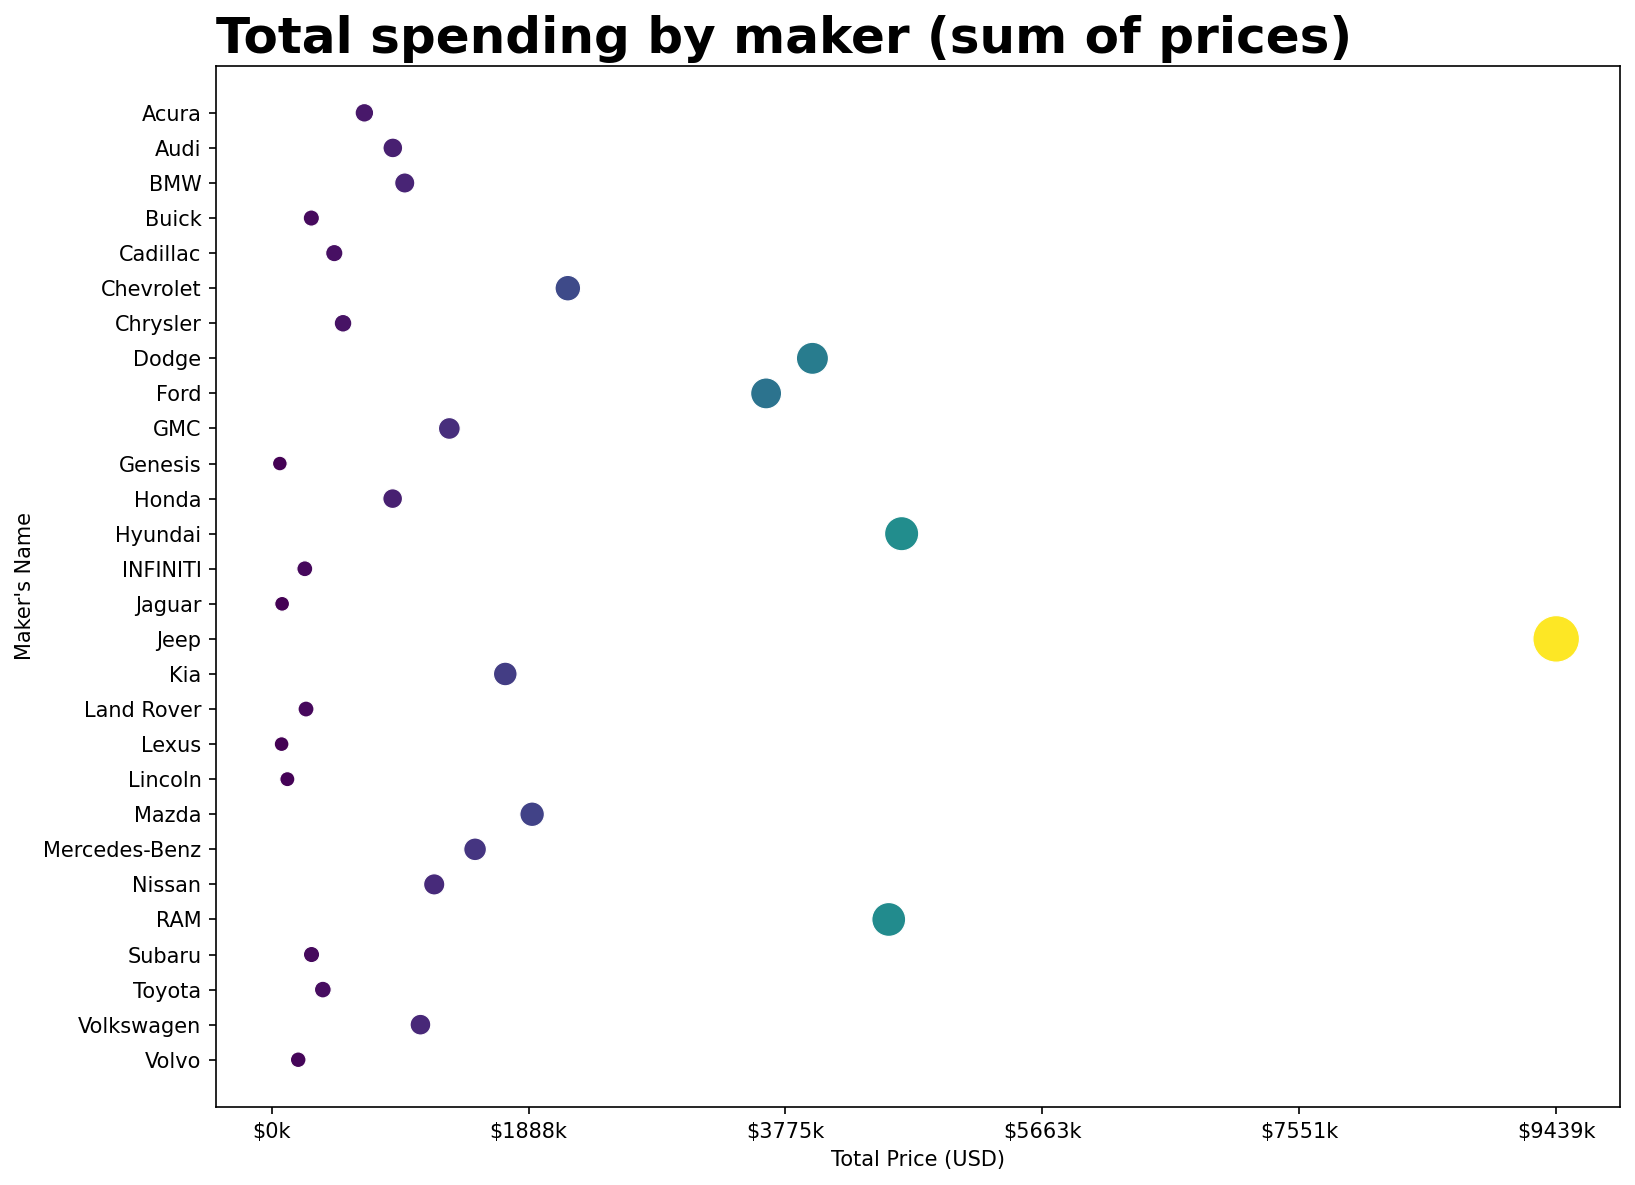

In [61]:
import matplotlib.ticker as ticker

make_price = cleanedData.groupby('make', as_index=False)['price'].sum()
make_price
plt.figure(figsize=(11,8), dpi=150)
ax = sns.scatterplot(
    data=make_price,
    x='price',
    y='make',
    size='price',
    hue='price',
    sizes=(50, 500),
    palette='viridis',
    legend=False
)

max_price = make_price['price'].max()
ticks = np.linspace(0, max_price, 6)
ax.set_xticks(ticks)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'${x/1000:.0f}k'))

ax.set_xlabel('Total Price (USD)')
ax.set_ylabel("Maker's Name")
ax.set_title("Total spending by maker (sum of prices)", loc='left', fontdict={'weight':'bold','size':24})
plt.tight_layout()
plt.show()

## Feature Engineering

1. Make a Prediction data for Feature Engineering and Model training

In [62]:
predictionData = cleanedData[['make', 'year', 'price', 'cylinders', 'fuel', 'mileage', 'body', 'doors', 'drivetrain']]

In [63]:
predictionData.head()

,make,year,price,cylinders,fuel,mileage,body,doors,drivetrain
0,Jeep,2024,74600.0,6.0,Gasoline,10.0,SUV,4.0,Four-wheel Drive
1,Jeep,2024,50170.0,6.0,Gasoline,1.0,SUV,4.0,Four-wheel Drive
2,GMC,2024,96410.0,8.0,Gasoline,0.0,SUV,4.0,Four-wheel Drive
4,RAM,2024,81663.0,6.0,Diesel,10.0,Pickup Truck,4.0,Four-wheel Drive
6,Jeep,2024,63862.0,6.0,Gasoline,5.0,SUV,4.0,Rear-wheel Drive


2. Add an Age feauture which shows the age of a car

In [64]:
# Example
current_year = 2024 
predictionData.loc[:,'age'] = current_year - predictionData['year']

C:\Users\Shaurya Srivastava\AppData\Local\Temp\ipykernel_4300\2453037954.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictionData.loc[:,'age'] = current_year - predictionData['year']


3. Perform Feature Encoding on make, fuel, body, drive train

In [65]:
# Example Fix
encodedData = pd.get_dummies(predictionData, columns=['make', 'fuel', 'body','drivetrain'], drop_first=True)
encodedData

,year,price,cylinders,mileage,doors,age,make_Audi,make_BMW,make_Buick,make_Cadillac,make_Chevrolet,make_Chrysler,make_Dodge,make_Ford,make_GMC,make_Genesis,make_Honda,make_Hyundai,make_INFINITI,make_Jaguar,make_Jeep,make_Kia,make_Land Rover,make_Lexus,make_Lincoln,make_Mazda,make_Mercedes-Benz,make_Nissan,make_RAM,make_Subaru,make_Toyota,make_Volkswagen,make_Volvo,fuel_Diesel (B20 capable),fuel_E85 Flex Fuel,fuel_Electric,fuel_Gasoline,fuel_Hybrid,fuel_PHEV Hybrid Fuel,body_Convertible,body_Hatchback,body_Minivan,body_Passenger Van,body_Pickup Truck,body_SUV,body_Sedan,drivetrain_Four-wheel Drive,drivetrain_Front-wheel Drive,drivetrain_Rear-wheel Drive
0,2024,74600.0,6.0,10.0,4.0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False
1,2024,50170.0,6.0,1.0,4.0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False
2,2024,96410.0,8.0,0.0,4.0,0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False
4,2024,81663.0,6.0,10.0,4.0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False
6,2024,63862.0,6.0,5.0,4.0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,2024,69315.0,6.0,0.0,4.0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False
997,2024,59037.0,4.0,10.0,3.0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
998,2024,49720.0,4.0,0.0,4.0,0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
999,2024,69085.0,6.0,20.0,4.0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False


## Data Preprocessing

### Train and Test Data

In [66]:
X = encodedData.drop(['price'],axis=1)
y = encodedData['price']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=45,train_size=0.8,test_size=0.2)

### Data Scaling

In [67]:
scaler = StandardScaler()

# 1. Fit on training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# 2. Use the SAME scaler to transform the test data
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled,columns=X_test.columns)

## Model Selection and Evaluation

For this project we are going to use Linear Regression

In [68]:
linearModel = LinearRegression()

linearModel.fit(X_train_scaled_df,y_train)

prediction = linearModel.predict(X_test_scaled_df)

mae = mean_absolute_error(y_test, prediction)
rmse = np.sqrt(mean_squared_error(y_test, prediction))
r2 = r2_score(y_test, prediction)

print(f"MAE: ${mae:,.2f}")
print(f"RMSE: ${rmse:,.2f}")
print(f"R-squared: {r2:.4f}")

MAE: $7,216.15
RMSE: $9,140.43
R-squared: 0.6885


In [69]:
regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)
regressor.fit(X_train_scaled, y_train)

tunedregressor = RandomForestRegressor(n_estimators=100, max_features=0.57,random_state=0, oob_score=True)
tunedregressor.fit(X_train_scaled, y_train)

C:\Users\Shaurya Srivastava\AppData\Roaming\Python\Python313\site-packages\sklearn\ensemble\_forest.py:611: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,0.57
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,True


In [70]:
predictions = regressor.predict(X_test_scaled)

oob_score = regressor.oob_score_
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)

print(f'Out-of-Bag Score: {oob_score}')
print(f"MAE: ${mae:,.2f}")
print(f"RMSE: ${rmse:,.2f}")
print(f"R-squared: {r2:.4f}")

Out-of-Bag Score: 0.49022696177874137
MAE: $6,290.23
RMSE: $8,853.63
R-squared: 0.7078


In [71]:
predictions = tunedregressor.predict(X_test_scaled)

oob_score = tunedregressor.oob_score_
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)

print(f'Out-of-Bag Score: {oob_score}')
print(f"MAE: ${mae:,.2f}")
print(f"RMSE: ${rmse:,.2f}")
print(f"R-squared: {r2:.4f}")

Out-of-Bag Score: 0.689879206075898
MAE: $5,984.16
RMSE: $8,276.86
R-squared: 0.7446


In [72]:
sample = X_test.iloc[0:1]
samplePrice = y_test.iloc[0:1]
prediction = tunedregressor.predict(scaler.transform(sample))

sample_dict = sample.iloc[0].to_dict()

print(f"\nSample Data: {sample_dict}")
print(f"Predicted Price: {prediction[0]}\nActual Price: {samplePrice.values[0]}")


Sample Data: {'year': 2024, 'cylinders': 3.0, 'mileage': 6.0, 'doors': 4.0, 'age': 0, 'make_Audi': False, 'make_BMW': False, 'make_Buick': True, 'make_Cadillac': False, 'make_Chevrolet': False, 'make_Chrysler': False, 'make_Dodge': False, 'make_Ford': False, 'make_GMC': False, 'make_Genesis': False, 'make_Honda': False, 'make_Hyundai': False, 'make_INFINITI': False, 'make_Jaguar': False, 'make_Jeep': False, 'make_Kia': False, 'make_Land Rover': False, 'make_Lexus': False, 'make_Lincoln': False, 'make_Mazda': False, 'make_Mercedes-Benz': False, 'make_Nissan': False, 'make_RAM': False, 'make_Subaru': False, 'make_Toyota': False, 'make_Volkswagen': False, 'make_Volvo': False, 'fuel_Diesel (B20 capable)': False, 'fuel_E85 Flex Fuel': False, 'fuel_Electric': False, 'fuel_Gasoline': True, 'fuel_Hybrid': False, 'fuel_PHEV Hybrid Fuel': False, 'body_Convertible': False, 'body_Hatchback': False, 'body_Minivan': False, 'body_Passenger Van': False, 'body_Pickup Truck': False, 'body_SUV': True, '

If we add 3000$ in the predicted price it will match the price of actual price

### Hyper parameter tuning for Randome Forest Regressor

Only to be used when regressor is not runned

In [ ]:
# # Define the search space for continuous hyperparameters
# # For example, 'n_estimators' (integer) and 'max_features' (continuous)
# param_distributions = {
#     'n_estimators': [100, 200, 300],
#     'max_features': uniform(0.1, 0.9) # Continuous range from 0.1 to 1.0 (0.1 + 0.9)
# }

# # Perform Randomized Search
# random_search = RandomizedSearchCV(
#     estimator=regressor,
#     param_distributions=param_distributions,
#     n_iter=50, # Number of random combinations to try
#     cv=5,       # 5-fold cross-validation
#     scoring='neg_mean_squared_error', # Metric for evaluation
#     random_state=42
# )

# # Fit the search to your data
# random_search.fit(X_train_scaled_df, y_train)

# # Get the best hyperparameters
# best_params = random_search.best_params_
# best_params

{'max_features': np.float64(0.5722807884690141), 'n_estimators': 100}